In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_moons
from sklearn.utils import shuffle

In [2]:
n = 10016
batch_size = 32

In [3]:
X, Y = make_moons(n_samples=n, noise=0.1)
X, Y = shuffle(X, Y, random_state=72)

In [4]:
Xs = []
Ys = []
batch_num = int(np.ceil(len(X) / batch_size))

In [5]:
for i in range(batch_num):
    start = i * batch_size
    end = start + batch_size
    Xs.append(X[start:end])
    Ys.append(Y[start:end])

In [6]:
Xs = np.array(Xs).reshape(batch_num, batch_size, 2, 1)
Ys = np.array(Ys).reshape(batch_num, batch_size, 1, 1)
X = X.reshape(n, 2, 1)
Y = Y.reshape(n, 1, 1)

In [7]:
size = [2, 10, 5, 1]

In [8]:
weights = [0]
biases = [0]
for i in range(0, len(size) - 1):
    weights.append(np.random.rand(size[i + 1], size[i]))
    biases.append(np.random.rand(size[i + 1], 1))

In [9]:
weights

[0,
 array([[0.3379815 , 0.73837976],
        [0.24212498, 0.46216602],
        [0.66003343, 0.27258074],
        [0.38050032, 0.01938318],
        [0.87383225, 0.66853657],
        [0.00737183, 0.52031437],
        [0.13870491, 0.98974743],
        [0.14926927, 0.7453004 ],
        [0.60885625, 0.5190036 ],
        [0.29732457, 0.86571839]]),
 array([[0.0790488 , 0.92773061, 0.91167771, 0.73616191, 0.40472425,
         0.18926245, 0.98274009, 0.6907653 , 0.78436005, 0.13386231],
        [0.48878121, 0.19692151, 0.41081655, 0.00869434, 0.93382964,
         0.60430437, 0.2618454 , 0.1129233 , 0.51255421, 0.62325628],
        [0.56096284, 0.97422187, 0.48121531, 0.1018909 , 0.098901  ,
         0.09669848, 0.09032487, 0.62457062, 0.12232965, 0.02890651],
        [0.17978795, 0.13523542, 0.89088491, 0.67337747, 0.17783628,
         0.84851044, 0.71720663, 0.59897496, 0.21654631, 0.42113637],
        [0.00733723, 0.54595316, 0.35984523, 0.03595827, 0.56692553,
         0.81208205, 0.198226

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [12]:
def feed_forward(xi, weights, biases):
    activations = [xi]
    z1 = weights[1] @ xi + biases[1]
    a1 = sigmoid(z1)
    activations.append(a1)
    for i in range(2, len(weights)):
        zn = weights[i] @ activations[-1] + biases[i]
        an = sigmoid(zn)
        activations.append(an)
    return activations

In [13]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

In [14]:
def backprop(weights, biases, xi, y, activations):
    deltas = [0] * len(activations)
    dL_dwK = [0] * len(activations)
    dL_dbK = [0] * len(activations)
    
    deltas[-1] = ( activations[-1] - y ) * sigmoid_derivative(activations[-1])
    dL_dwK[-1] = deltas[-1] @ activations[-1].T
    dL_dbK[-1] = deltas[-1]
    
    for i in range(len(deltas)-2, 0, -1):
        deltas[i] = ( weights[i+1].T @ deltas[ i + 1 ] ) * sigmoid_derivative(activations[i])
        dL_dwK[i] = deltas[i] @ activations[ i - 1 ].T
        dL_dbK[i] = deltas[i]
    
    return dL_dwK, dL_dbK

In [15]:
act = feed_forward(Xs[0][2], weights, biases)
print(act)
bc = backprop(weights, biases, Xs[0][2], Ys[0][2], act)[0]
for w in bc:
    if type(w) is not int: print(w.shape)

[array([[-0.7939019 ],
       [ 0.60439517]]), array([[0.56592835],
       [0.57672971],
       [0.55882888],
       [0.48759519],
       [0.47416847],
       [0.77678036],
       [0.67182531],
       [0.71019794],
       [0.50250545],
       [0.66653833]]), array([[0.98792649],
       [0.96403328],
       [0.9120708 ],
       [0.96023786],
       [0.96974885]]), array([[0.98721647]])]
(10, 2)
(5, 10)
(1, 1)


In [16]:
epochs = 20
lr = 0.1
loss = []

In [17]:
for i in tqdm(range(epochs)):
    epochloss = 0
    for j in range(batch_num):
        for i, xi in enumerate(Xs[j]):
            activations = feed_forward(xi, weights, biases)
            epochloss += L(activations[-1], Ys[j,i])
    
            dL_dw, dL_db = backprop(weights, biases, xi, Ys[j,i], activations)
            
            for i, w in enumerate(weights):
                w -= lr * dL_dw[i]
            for i, b in enumerate(biases):
                b -= lr * dL_db[i]
            
    loss.append(epochloss / n)

100%|███████████████████████████████████████████| 20/20 [00:05<00:00,  3.43it/s]


In [29]:
weights

[0,
 array([[-1.07366819,  0.89110207],
        [-1.07668279,  0.90647325],
        [ 1.0133409 , -0.73339137],
        [ 1.03487966, -0.76758196],
        [ 1.01095469, -0.66467931],
        [ 0.97602585, -0.38473363],
        [ 7.18606894,  2.24525126],
        [-1.18362096,  0.92489141],
        [ 0.98745763, -0.58882125],
        [ 0.70262506,  0.40007133]]),
 array([[-1.37333176, -0.56215871,  0.63519294,  0.58013308,  0.18812445,
         -0.5633336 , -1.62661744, -0.96334535,  0.52975426, -0.53542045],
        [-1.38738732, -1.89310886,  1.24855541,  1.3635217 ,  1.76364675,
          0.87178951, -5.43579681, -1.9489911 ,  1.27605398,  0.58001991],
        [-0.27379364,  0.45726748, -0.85230716, -1.35591514, -1.33673578,
         -0.96294922, -0.42227959, -0.02362963, -1.20724284, -1.00082021],
        [-1.53207749, -1.80288853,  1.71450677,  2.01127251,  0.98494977,
          1.13076954, -5.21909781, -1.29186593,  0.94919335,  0.37237667],
        [-1.85433067, -1.39251732,  1.

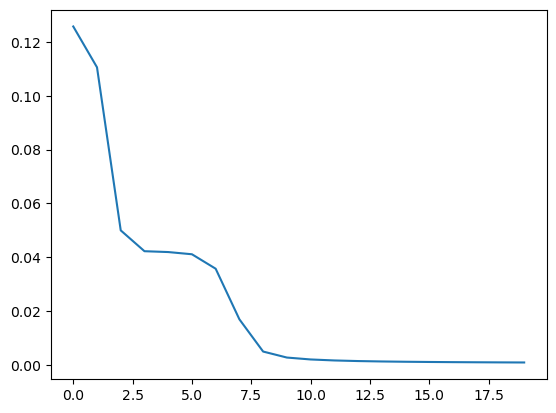

In [55]:
xcoord = np.array([n for n in range(epochs)]).reshape(epochs, 1)
ycoord = np.array(loss).reshape(epochs, 1)
plt.plot(xcoord, ycoord)
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('loss1.png')

In [36]:
def evaluate_visually(x, w, b):
    rb = []
    for xi in x:
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: rb.append('red')
        else: rb.append('blue')
    return rb

In [37]:
rb = evaluate_visually(X.reshape(n, 2, 1), weights, biases)

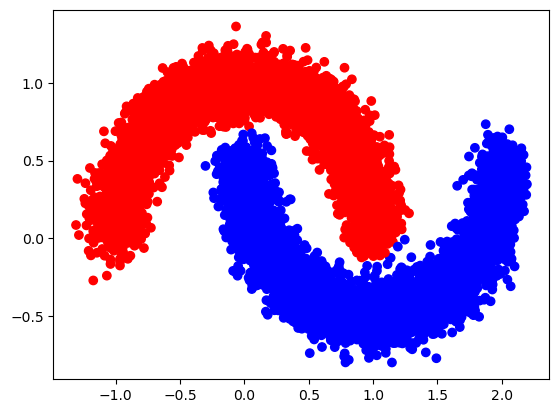

In [57]:
plt.scatter(Xs[:,:,0,:], Xs[:,:,1,:], c=rb)
plt.savefig('prediction1.png')

In [39]:
def evaluate_errors(x, w, b, y):
    rb = []
    for i, xi in enumerate(x):
        p = 0
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: p = 0
        else: p = 1
        if p == Y[i, 0]:
            rb.append('gray')
        else: rb.append('red')
    return rb

In [40]:
br = evaluate_errors(X, weights, biases, Y)

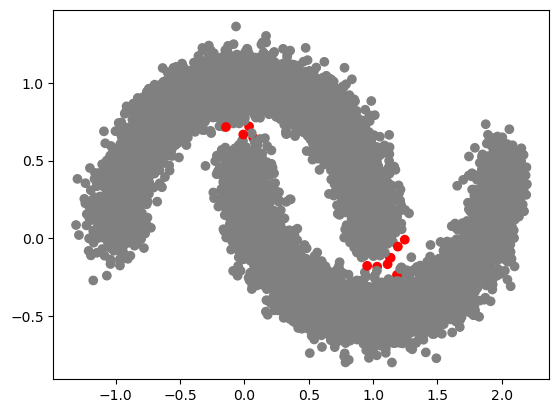

In [41]:
plt.scatter(X[:,0,:], X[:,1,:], c=br)

In [42]:
inc = 0
for c in br: 
    if c == 'red': inc += 1
print(f'Training Accuracy {inc} / {n} : {((n-inc)/n)*100:.2f}%')

Training Accuracy 12 / 10016 : 99.88%
